# Notebook intended for submission

## Imports

In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/michael/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer # For sentiment analysis
import cPickle as pickle # For loaded dataset from pickle file
import tqdm # Progress bar
from collections import Counter # Handy addon
from pprint import pprint # Useful to print JSON objects
import numpy as np

## Load the dataset of articles with introductions 

In [4]:
# This loads the file that you want, might take several seconds (up to a minute)

with open("news_sentiment.pickle", "r") as f:
    articles = pickle.load(f)
print len(articles), "articles were loaded"
print "Example article:"
pprint(articles[1040])


57767 articles were loaded
Example article:
{u'introductions': [{u'person': u'Bashar al-Assad',
                     u'text': u'President',
                     u'wdid': u'Q44329'},
                    {u'person': u'Emile Hokayem',
                     u'text': u'in Foreign Policy'},
                    {u'person': u'Ahrar al Sham',
                     u'text': u'the most important groups',
                     u'wdid': u'Q860943'},
                    {u'person': u'Vladimir Putin',
                     u'text': u'Russian President',
                     u'wdid': u'Q7747'},
                    {u'person': u'Barack Obama',
                     u'text': u'U.S. President',
                     u'wdid': u'Q76'},
                    {u'person': u'Osama Abu Zeid',
                     u'text': u'a senior adviser to the moderate Free Syrian Army'},
                    {u'person': u'Op-Ed',
                     u'text': u'for The Washington Post',
                     u'wdid': u'Q2602337'},
 

In [5]:
# separate articles from the two stories
ISIS_articles = []
Brexit_articles = []
for a in articles:
    if a["news_topic"] == 'ISIS War':
        ISIS_articles.append(a)
    else:
        Brexit_articles.append(a)
        
print len(ISIS_articles), " articles from ISIS War and ", len(Brexit_articles), "articles from Brexit were loaded"

39206  articles from ISIS War and  18561 articles from Brexit were loaded


In [6]:
# get only articles from one story, you can change this
#articles = ISIS_articles
articles = Brexit_articles

## Extract introductions, and obtain their sentiment

In [7]:
analyzer = SentimentIntensityAnalyzer()

total_introductions = []
for a in articles:
    for intro in a.get('introductions', []):
        intro['source'] = a['source']
        total_introductions.append(intro)

for intro in tqdm.tqdm_notebook(total_introductions):
    intro['sentiment'] = analyzer.polarity_scores(intro['text'])['compound']

Widget Javascript not detected.  It may not be installed properly.


In [8]:
# Example some sentiment for some of the introductions

subsample = np.random.choice(total_introductions, 10)
for intro in subsample:
    if intro['sentiment'] != 0:
        print "---------------"
        print "Entity mentionned:", intro['person']
        print intro['text']
        print "Sentiment:", intro['sentiment']

---------------
Entity mentionned: Katie Hopkin
the controversial columnist
Sentiment: -0.2023
---------------
Entity mentionned: Rachel Reeves
the shadow chief secretary to the Treasury
Sentiment: 0.2023
---------------
Entity mentionned: Isaac Herzog
Herzog invites Britain 's Corbyn to Israel amid anti - Semitism row 
 on Saturday
Sentiment: -0.3182


## Extract the words to use for the word count matrices

In [9]:
# gets all of the introductions and splits on whitespace
intro_texts = map(lambda x: x[u'text'].split(), total_introductions)
# converts to lowercase and flattens list
words = []
for intro in intro_texts:
    for word in intro:
        words.append(word.lower())


In [10]:
# counts all of the words
word_counts = {}
for word in words:
    # word already seen
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1


In [11]:
# most common words found
word_counts_list = [el for el in word_counts.iteritems()]
word_counts_list.sort(key = lambda x: -x[1])

In [12]:
# prints most common words
n = 40
print '%s most common words' % n
for i in range(n):
    print '%s, %s' % (word_counts_list[i][0], word_counts_list[i][1])

40 most common words
the, 43551
mr, 34397
of, 17702
's, 16356
minister, 15697
leader, 15014
a, 11524
labour, 10365
prime, 9950
who, 9783
in, 9699
,, 8768
secretary, 8310
-, 7736
party, 7571
to, 7139
and, 7003
former, 6968
for, 4792
president, 4462
brexit, 4422
on, 4065
britain, 3892
", 3753
shadow, 3750
at, 3683
conservative, 3548
lord, 3512
european, 3475
scottish, 3463
eu, 3436
his, 3430
chancellor, 3383
mp, 3304
chief, 3215
sir, 2809
british, 2705
ukip, 2697
may, 2519
london, 2396


In [13]:
# hyperparameters for selecting important words
word_pos_threshold = 0.1
word_neg_threshold = -0.1
word_freq_threshold = 10  # shows up at least this many times

charged_words = []
for word, count in word_counts_list:
    if count < word_freq_threshold:
        break  # ok because sorted by frequency already
    word_sentiment = analyzer.polarity_scores(word)['compound']
    if word_sentiment > word_pos_threshold or word_sentiment < word_neg_threshold:
        charged_words.append((word, word_sentiment, count))


In [14]:
charged_words_list = zip(*charged_words)[0]
print(len(charged_words_list))
print charged_words_list
x = map(lambda x: str(x), charged_words_list)
print ', '.join(x)

387
(u'party', u'defence', u'justice', u'treasury', u'rescue', u'no', u'energy', u'miss', u'anti', u'supporter', u'prominent', u'support', u'charity', u'united', u'top', u'stop', u'won', u'lost', u'friend', u'hard', u'war', u'supreme', u'better', u'win', u'contender', u'successor', u'resigned', u'gt', u'like', u'legal', u'good', u'well', u'special', u'yes', u'defense', u'best', u'accused', u'supporters', u'popular', u'critic', u'great', u'outgoing', u'free', u'winning', u'pressure', u'challenger', u'influential', u'limited', u'comedian', u'security', u'responsible', u'supporting', u'powerful', u'defeat', u'failed', u'warned', u'hugs', u'clear', u'favour', u'parties', u'supports', u'attack', u'strong', u'battle', u'rebel', u'progress', u'controversial', u'supported', u'avid', u'succeed', u'died', u'losing', u'resignation', u'hand', u'poor', u'resign', u'stronger', u'cuts', u'crisis', u'respected', u'care', u'defector', u'strongly', u'defeated', u'champion', u'strikes', u'criticism', u'f

## construct source2j here for consistency with indices among models

In [15]:
source_indices = """
0 telegraph.co.uk
1 foxnews.com
2 ap.org
3 businessinsider.in
4 independent.co.uk
5 reuters.com
6 wikinews.org
7 cnn.com
8 techcrunch.com
9 aa.com.tr
10 allafrica.com
11 nytimes.com
12 bloomberg.com
13 bbc.co.uk
14 latimes.com
15 rt.com
16 france24.com
17 chinadaily.com.cn
18 theguardian.com
19 washingtonpost.com
20 middleeasteye.net
21 aljazeera.com"""

def eval_line(line):
    line = line.split(' ')
    return (int(line[0]), str(line[1]))

lines = filter(lambda x: x, source_indices.split('\n'))
sources = map(lambda line: eval_line(line), lines)
source2j = dict(sources)
print source2j

{0: 'telegraph.co.uk', 1: 'foxnews.com', 2: 'ap.org', 3: 'businessinsider.in', 4: 'independent.co.uk', 5: 'reuters.com', 6: 'wikinews.org', 7: 'cnn.com', 8: 'techcrunch.com', 9: 'aa.com.tr', 10: 'allafrica.com', 11: 'nytimes.com', 12: 'bloomberg.com', 13: 'bbc.co.uk', 14: 'latimes.com', 15: 'rt.com', 16: 'france24.com', 17: 'chinadaily.com.cn', 18: 'theguardian.com', 19: 'washingtonpost.com', 20: 'middleeasteye.net', 21: 'aljazeera.com'}


## Build word count matrix

In [16]:
# for indexing the charged words
charged_words_dict = dict(zip(charged_words_list, [i for i in range(len(charged_words_list))]))

In [17]:
# count number of unique sources
sources = set(map(lambda intro: intro['source'], total_introductions))
num_unique_sources = len(sources)
sources_dict = dict(map(lambda x: x[::-1], source2j.iteritems()))

In [18]:
# Build word count matrix that is sources by charged_words

# initialize with zeros
data_matrix_sources = np.zeros((len(charged_words_list), num_unique_sources), dtype=np.float)

for intro in total_introductions:
    intro_text = intro[u'text'].split()
    
    # if word is a charged word, increment corresponding data cell by 1
    for word in intro_text:
        if word in charged_words_dict:
            s = intro['source']
            data_matrix_sources[charged_words_dict[word], sources_dict[s]] += 1

## Build a 2-dimensional object containing sentiment per entity, per source

In [19]:
ent_source_sent = {}

for intro in total_introductions:
    p = intro['person']
    s = intro['source']
    if p not in ent_source_sent:
        ent_source_sent[p] = {}
    if s not in ent_source_sent[p]:
        ent_source_sent[p][s] = []
    ent_source_sent[p][s].append(intro['sentiment'])

In [20]:
# We get rid of entities that don't contain enough data

entities_kept = []

for entity in ent_source_sent.keys():
    sentiments = ent_source_sent[entity]
    total_size = sum([len(sentiments[source]) for source in sentiments.keys()])
    if total_size >= 3:
        entities_kept.append(entity)
        
print "We will keep a total of %s / %s in our dataset" % (len(entities_kept), len(ent_source_sent.keys()))


sources = set([])
for entity in entities_kept:
    sources|= set(ent_source_sent[entity].keys())
sources = list(sources)

print "We have ", len(sources), "sources: ", sources

We will keep a total of 4525 / 13497 in our dataset
We have  22 sources:  [u'telegraph.co.uk', u'allafrica.com', u'foxnews.com', u'reuters.com', u'businessinsider.in', u'independent.co.uk', u'wikinews.org', u'cnn.com', u'techcrunch.com', u'aa.com.tr', u'ap.org', u'nytimes.com', u'bloomberg.com', u'bbc.co.uk', u'latimes.com', u'rt.com', u'france24.com', u'chinadaily.com.cn', u'theguardian.com', u'washingtonpost.com', u'middleeasteye.net', u'aljazeera.com']


## We create the array we will use in our sparse model

In [21]:
# Parameters: changing these affects the results you get
Pos_neg_ratio = 2.0
overall_ratio = 0.15
pos_threshold = 0.15
neg_threshold = -0.15

N = len(entities_kept)
M = len(sources)
A = np.zeros((N, M))

sentiment_counts = Counter()

source2j = {source: j for j, source in enumerate(sources)}

for i, entity in enumerate(entities_kept):
    for source in ent_source_sent[entity].keys():
        sent_array = np.array(ent_source_sent[entity][source])
        N_pos = float(len(np.where(sent_array > pos_threshold)[0]))
        N_neg = float(len(np.where(sent_array < neg_threshold)[0]))
        T = float(len(sent_array))
        aggregate_sentiment = 0
        if N_pos > Pos_neg_ratio*N_neg and N_pos > overall_ratio*T:
            aggregate_sentiment = 1
        elif N_neg > Pos_neg_ratio*N_pos and N_neg > overall_ratio*T:
            aggregate_sentiment = -1
        j = source2j[source]
        
        A[i,j] = aggregate_sentiment
        
        sentiment_counts[aggregate_sentiment] += 1

print "We allocated some sentiment in this matrix, the repartition is:", sentiment_counts

We allocated some sentiment in this matrix, the repartition is: Counter({0: 10028, 1: 2305, -1: 764})


## Model source similarity

In [22]:
# Write code that uses this matrix (entities, sources) to compute
# source similarity visible in bias of the way they describe entities

In [23]:
def soft_threshold (x, t):
    if x > 0:
        return max(x-t, 0)
    else:
        return min(x+t, 0)

In [24]:
def graphical_lasso (X, lambda_parameter = 0.01, max_iteration = 100, threshold = 1e-6, lambda_inv = 1e-6):
    ##################################################
    # X: the original data matrix
    # lambda_parameter: hyperparameter for L1 penalty
    # max_iteration: maximum iteration
    # threshold: convergence threshold
    ##################################################
    
    S = np.cov(X.T)  # sample covariance matrix
    lambda_iden = np.identity(S.shape[0]) * lambda_inv
    
    #### check whether hyperparameter is zero ####
    
    if lambda_parameter == 0:  # when lambda = 0, simply reutrn the inverse of sample covariance matrix
        return np.linalg.inv(S + lambda_iden)
    
    #### if hyperparameter is not zero, go on ####
    
    #### step 1 in algorithm 9.1 ####
    p = X.shape[1]                          # number of features
    W = np.cov(X.T) + lambda_iden                # set the initial W matrix
    precision = np.linalg.inv(np.cov(X.T) + lambda_iden)  # initialize the precision matrix
    index = np.arange(p)                    # index used to partition the matrix W and S
    
    #### step 2 in algorithm 9.1 ####
    B = np.zeros((p - 1, p))  # used to store the beta coefficients
    for i in range(max_iteration):
        W_old = W.copy()  # later used to check for convergence
        
        
        for j in range(p):
            index_j = index != j
            # partition W and S
            W_11 = W[index_j].T[index_j]        # select W matrix's all but the jth row and column to form W_11
            s_12 = S[j, index_j]                   # select the s12 from S, I actually select s12.T for easier dimension
            beta_j = - precision[index_j, j] / precision[j, j]  ##??## is this the right way to define the initial beta_j?
            
            # pathwise coordinate descent
            for n in range(max_iteration):
                beta_old = beta_j.copy()  # previous beta, used for checking convergence of beta_j
                for k in range(p - 1): 
                    ##!!## this is adopted from 17.26 in Elements of Statistical Learning by Hastie, Tishirani, and Friedman
                    beta_j[k] = soft_threshold(s_12[k] - np.dot(W_11[k], beta_j) + W_11[k, k] * beta_j[k],
                                               lambda_parameter) / W_11[k, k]
                
                # convergence condition for coordinate descent
                if np.linalg.norm(beta_j - beta_old) < threshold:
                    break
            
            # store the beta coefficients for jth freature
            B[:, j] = beta_j
            
            # update the w_12
            W[index_j, j] = np.dot(W_11, beta_j)
            
        if i == max_iteration - 1:
            print "The coordinate descent did not converge. Try to increase the maximum number of iterations."
        
        if np.sum(np.isnan(W) > 0):
            import pdb; pdb.set_trace()
        
        if np.linalg.norm(W - W_old) < threshold:
            break
    
    #### step 3 in algorithm 9.1 ###
    # update the precision matrix with result in the final round
    for j in range(p):
        precision[j, j] = 1 / (W[j, j] - np.dot(W[index != j, j], B[np.arange(p - 1), j]))  # this is theta_hat_22
        precision[index != j, j] = - B[np.arange(p - 1), j] * precision[j, j]               # this is theta_hat_12
    
    return precision    

In [25]:
# test a wider variety of regularization coefficients
%timeit results = [graphical_lasso(A, value, threshold = 1e-10) for value in np.logspace(-10.0, 0.0, 41)]
result1 = graphical_lasso(A, 0.01, threshold = 1e-10)

1 loop, best of 3: 3.17 s per loop


In [26]:
# after trial and error
optimal_lambda = 1e-4
print np.round(np.log(optimal_lambda) / np.log(10), decimals=2)

-4.0


### spring layout



In [27]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

In [28]:
def plot_spring_layout_graph(adj_mat, node_names):
    n = adj_mat.shape[0]
    G = nx.Graph()
    
    G.add_nodes_from([node_names[i] for i in range(n)])

    edges = []
    for i in range(n):
        for j in range(i+1, n):
            #edge_weight = np.exp(weight * adj_mat[i, j])
            edge_weight = adj_mat[i, j]
            if edge_weight != 0:
                edges.append((node_names[i], node_names[j], edge_weight))
    G.add_weighted_edges_from(edges)
    pos = nx.spring_layout(G, iterations=500)
    return G, pos

0.0001


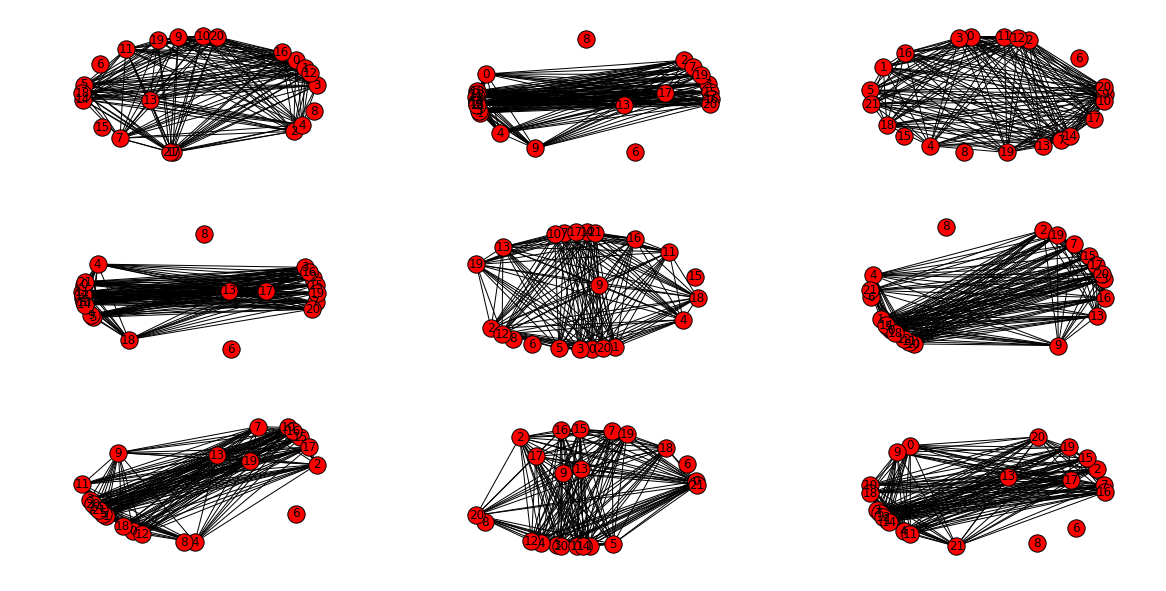

In [31]:
%matplotlib inline
## matplotlib params
plt.rcParams['figure.figsize'] = [20, 10]

optimal_lambda = 1e-4
print optimal_lambda

A = data_matrix_sources

for i in range(9):
    plt.subplot(331 + i)

    idx = np.random.choice(A.shape[0], int(0.8 * A.shape[0]), replace=False)
    masked_A = A[idx, :]
    result = graphical_lasso(masked_A, optimal_lambda, threshold = 1e-10)

    j2source = [i for i in range(len(source2j))]
    #import pdb; pdb.set_trace()
    G, pos = plot_spring_layout_graph(result, j2source)

    nx.draw(G, pos, with_labels=True, bold=True)
plt.savefig('sample_brexit_plots.pdf')



0.0001


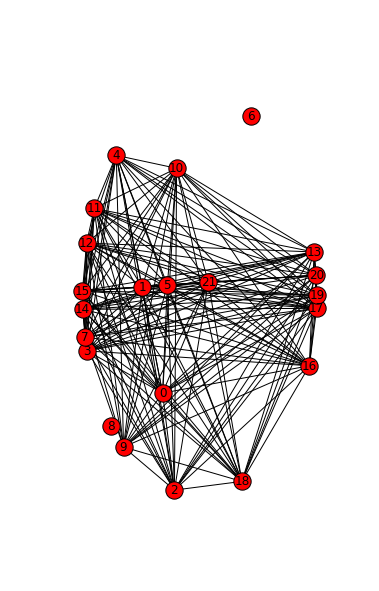

In [32]:
%matplotlib inline
## matplotlib params
plt.rcParams['figure.figsize'] = [20, 10]

optimal_lambda = 1e-4
print optimal_lambda
plt.subplot(111 + i)

result = graphical_lasso(A, optimal_lambda, threshold = 1e-10)

j2source = [i for i in range(len(source2j))]
#import pdb; pdb.set_trace()
G, pos = plot_spring_layout_graph(-result, j2source)

nx.draw(G, pos, with_labels=True, bold=True)
plt.savefig('brexit_full_plot.pdf')




## Test how the graphs look with sparse PCA

In [45]:
from sklearn import decomposition

(428, 22)
(2, 22)


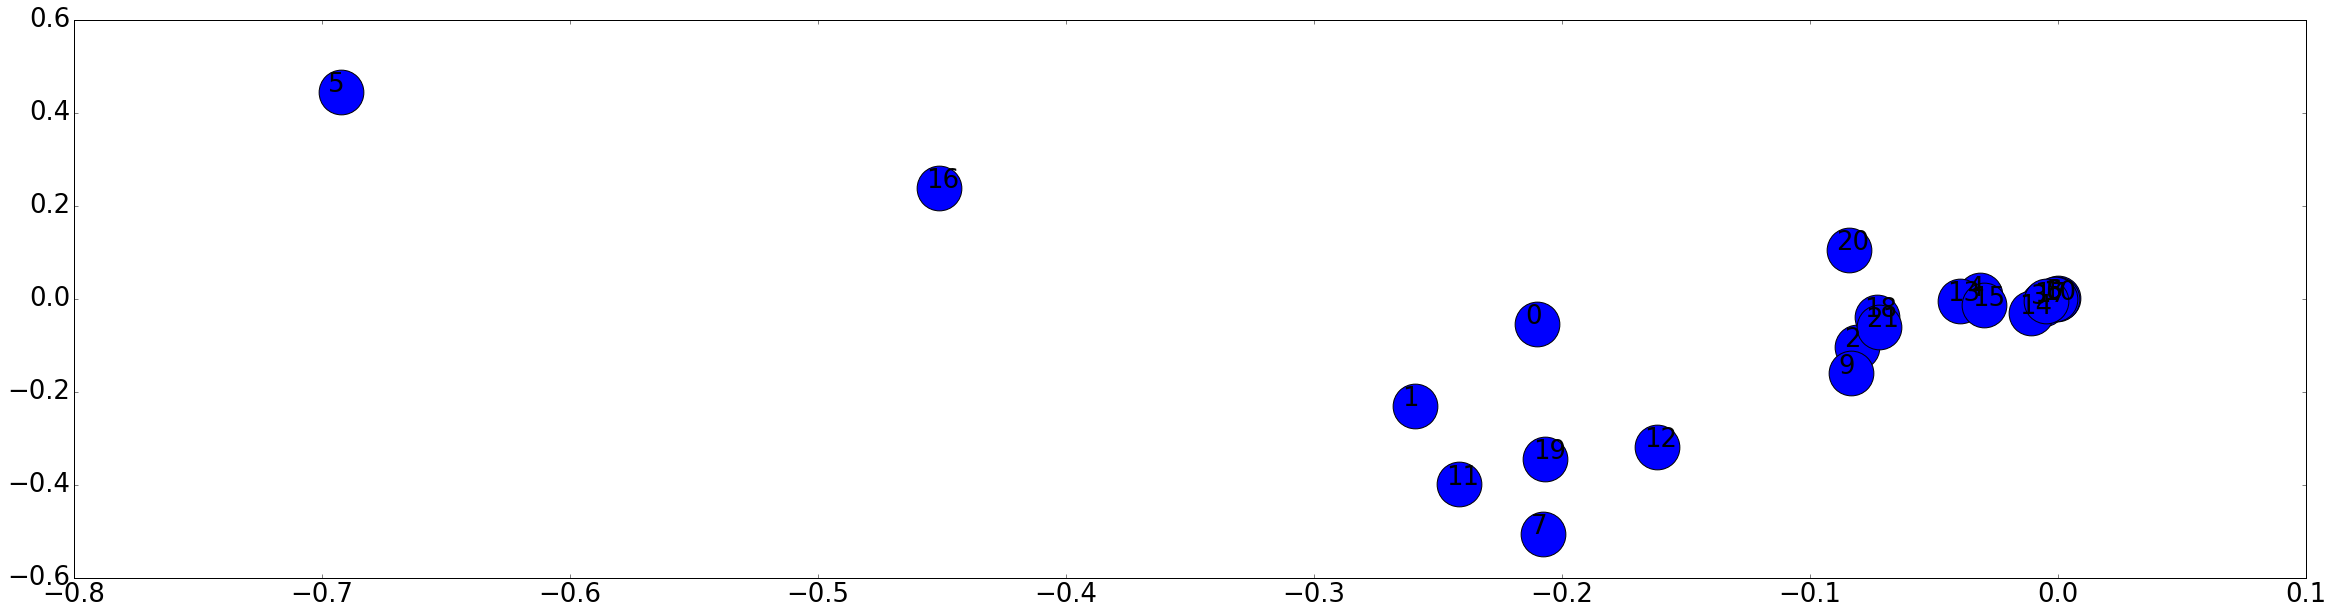

In [146]:
#  Sparse PCA stuff
#  want to find what journals think of people overall.

%matplotlib inline
plt.rcParams['figure.figsize'] = [40, 10]

matplotlib.rcParams.update({'font.size': 26})

n = 2 # extract 2 components for plotting
# alpha is a sparsity param
print data_matrix_sources.shape
estimator = decomposition.SparsePCA(n_components=n, alpha=1e-2)
estimator.fit_transform(data_matrix_sources)  # for reduction on words

components = estimator.components_
projected_data = estimator.fit_transform(data_matrix_sources.T)
print components.shape
#import pdb; pdb.set_trace()

fig, ax = plt.subplots()
ax.scatter(projected_data[:, 0], projected_data[:, 1], s=2e3)
for i in range(projected_data.shape[0]):
    plt.annotate(str(i), (projected_data[i, 0] - 0.005, projected_data[i, 1]))

plt.savefig('results_spca_isis_full.pdf')
    
x=0



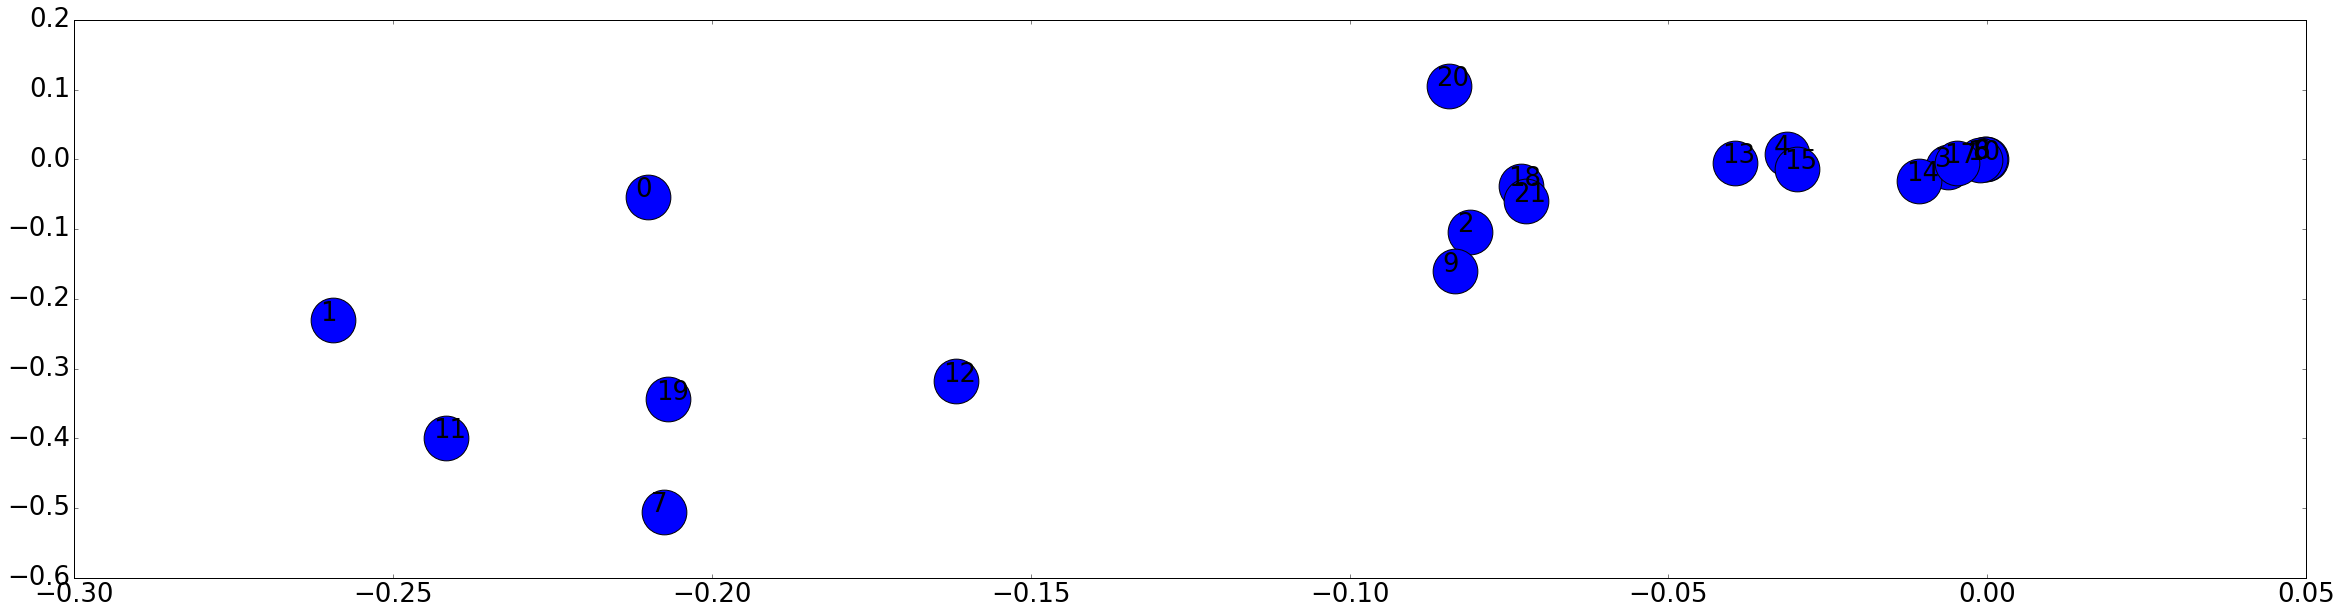

In [145]:
# remove outliers to get closer look at rest of them
to_remove = [5, 16]
test = np.zeros((20, 3))
index = 0
for i in range(22):
    if i not in to_remove:
        test[index, :2] = projected_data[i]
        test[index, 2] = i
        index += 1

fig, ax = plt.subplots()
ax.scatter(test[:, 0], test[:, 1], s=2e3)
for i in range(test.shape[0]):
    plt.annotate(str(int(test[i, 2])), (test[i, 0] - 2e-3, test[i, 1]))
    
plt.savefig('results_spca_isis_remove_outliers.pdf')

x=0